## Churn Prediction in Telecom Customer dataset

### Dataset Source: https://learn.datacamp.com/courses/marketing-analytics-predicting-customer-churn-in-python

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

import warnings
warnings.filterwarnings('ignore')

### Reading dataset

In [2]:
df = pd.read_csv("Churn.csv")

display(df.head())
print("dataframe shape:",df.shape)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


dataframe shape: (3333, 21)


### Dataset information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

#### Observation
- There are no missing value.

### Data Preprocessing

#### Dropping irrelevant features from the dataset

In [4]:
df = df.drop(['State', 'Area_Code', 'Phone'], axis=1)

- This has no direct relation with a customer's possibility to churn or not

#### Checking object variable and changing it to numeric variable

In [5]:
print(df['Churn'].unique())
print(df['Intl_Plan'].unique())
print(df['Vmail_Plan'].unique())

['no' 'yes']
['no' 'yes']
['yes' 'no']


- Numeric datatype suitable for training a model 

In [6]:
df['Churn'] = df['Churn'].replace(({'no':0, 'yes':1}))
df['Intl_Plan'] = df['Intl_Plan'].replace(({'no':0, 'yes':1}))
df['Vmail_Plan'] = df['Vmail_Plan'].replace(({'no':0, 'yes':1}))

display(df.head())
print("\nDataset Variable information:\n")
df.info()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73



Dataset Variable information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   int64  
 8   Intl_Plan       3333 non-null   int64  
 9   Vmail_Plan      3333 non-null   int64  
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  I

### Setting target and feature variables

In [7]:
X = df.drop('Churn', axis = 1)
y = df[['Churn']]

print("Feature variables:" ,X.shape)
print("Target variables:" ,y.shape)

Feature variables: (3333, 17)
Target variables: (3333, 1)


### Checking balance of the target variable

In [8]:
print(df['Churn'].value_counts())


0    2850
1     483
Name: Churn, dtype: int64


- The **target dataset** is highly **imbalanced**, Stratification will be helpful for training a model properly

### One-Hot Encoding

In [9]:
df = pd.get_dummies(df, drop_first=True)

### Splitting train and test datasets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.7, 
                                                    random_state = 42, stratify = y)

print("X_train.shape:",X_train.shape,"\nX_test.shape:", X_test.shape,"\ny_train.shape:", y_train.shape, "\nX_test.shape:",y_test.shape)

X_train.shape: (2333, 17) 
X_test.shape: (1000, 17) 
y_train.shape: (2333, 1) 
X_test.shape: (1000, 1)


##### Stratifaction provides same class ratio of target variable for both train and test set

In [11]:
def Ratio(a,b):
    class_0 = a['Churn'].value_counts().values[0]
    class_1 = a['Churn'].value_counts().values[1]

    ratio = class_1/class_0
    print(b,"Ratio: ",ratio)
    
Ratio(y_train,"Training")
Ratio(y_test,"Test")

Training Ratio:  0.16942355889724312
Test Ratio:  0.1695906432748538


### Instantiating and fitting the model

In [12]:
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [13]:
y_test['probability'] = np.round(model.predict_proba(X_test)[:,1], 2)
y_test['predicted_Churn'] = y_pred

display(y_test.sample(7))

,Churn,probability,predicted_Churn
3260,0,0.0,0
2614,1,0.0,0
3233,0,0.0,0
2690,0,0.0,0
2148,0,0.0,0
2105,0,1.0,1
1908,0,0.0,0


In [14]:
test = pd.concat([X_test, y_test], axis=1)
display(test.sample(5))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Churn,probability,predicted_Churn
2934,24,0,149.0,131.0,238.6,8.6,2,0,0,73,25.33,81,11.14,69,10.74,3,2.32,1,0.0,0
767,148,26,244.9,118.0,236.0,15.2,2,0,1,150,41.63,138,10.03,91,10.62,4,4.10,0,0.0,0
2512,62,42,137.3,184.2,231.4,10.2,0,0,1,95,23.34,94,15.66,70,10.41,3,2.75,0,0.0,0
3177,84,41,153.9,140.7,217.7,12.8,1,0,1,102,26.16,117,11.96,101,9.80,5,3.46,0,0.0,0
2224,68,0,143.6,134.3,215.6,15.5,2,0,0,80,24.41,65,11.42,84,9.70,5,4.19,0,0.0,0


### Decision Tree

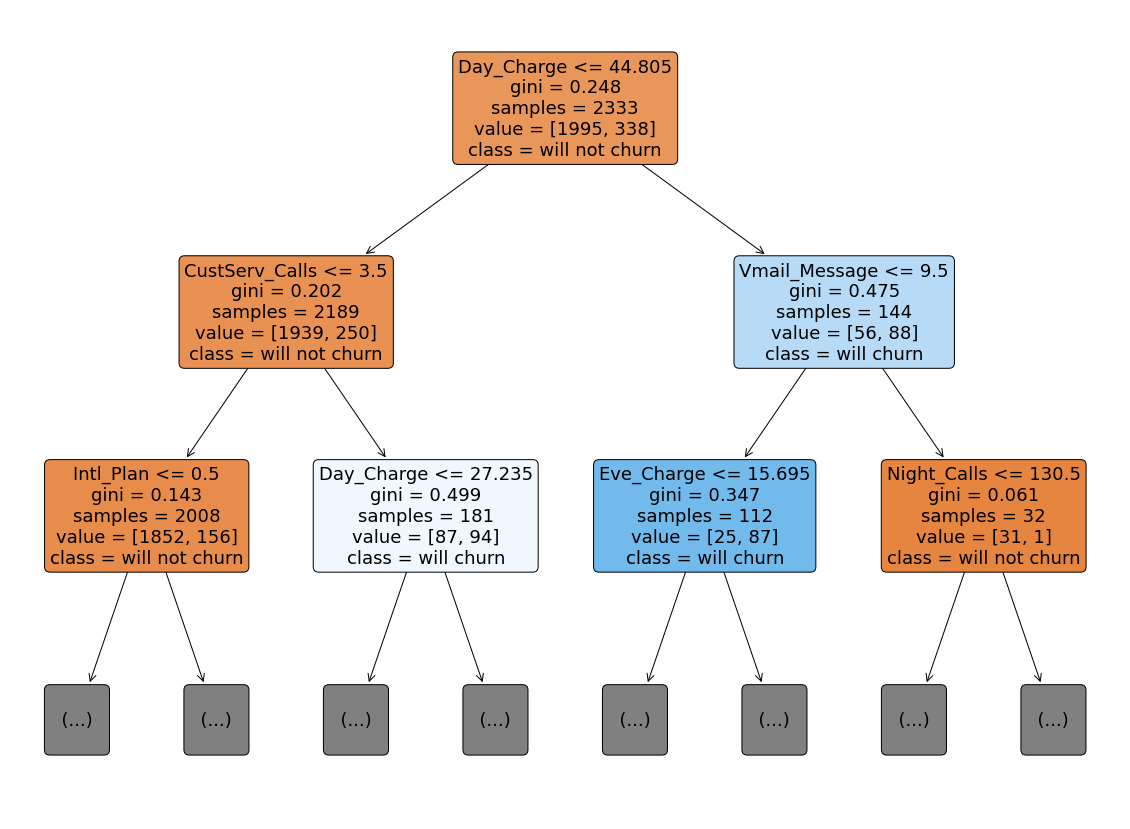

In [15]:
plt.figure(figsize = (20, 15))
plot_tree(model, 
          filled=True,
          rounded=True,
          class_names = ["will not churn", "will churn"],
          feature_names = X.columns,
          max_depth=2, 
          fontsize=18)

plt.show()

#### Confusion Matrix

In [16]:
confusion__matrix = confusion_matrix(y_test['Churn'], 
                                     y_test['predicted_Churn'])

print('confusion_matrix: \n', confusion__matrix)

confusion_matrix: 
 [[819  36]
 [ 45 100]]


In [17]:
y_test['Churn'].value_counts()

0    855
1    145
Name: Churn, dtype: int64

#### Visualizing confusion matrix

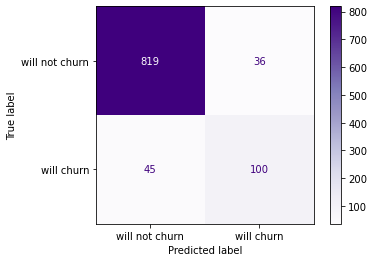

In [18]:
plot_confusion_matrix(model, 
                      X_test, 
                      y_test['Churn'], 
                      display_labels=["will not churn", "will churn"],
                      cmap='Purples')
plt.show()

#### Observation
- Out of 855 customers, 819 customers **will not churn**, were **correctly predicted**, which is **96%**
- While 100 customers who **will churn** were **correctly predicted**, out of 145 customers. That is **69%**

In [19]:
TP = confusion__matrix[1,1]
print("True Positives: ", TP)

TN = confusion__matrix[0,0]
print("True Negatives: ", TN)

FP = confusion__matrix[0,1]
print("False Positives: ", FP)

FN = confusion__matrix[1,0]
print("False Negatives: ", FN)

True Positives:  100
True Negatives:  819
False Positives:  36
False Negatives:  45


#### Observation
- Higher value of true positives and true negatives are desired.
- False negatives and false positives should be lower.

In [20]:
accuracy = accuracy_score(y_test['Churn'], y_test['predicted_Churn'])

print('Accuracy of the model =',np.round(accuracy*100,2), '%') 

Accuracy of the model = 91.9 %


#### Classification metrices calculation

In [21]:
def measure(m):
    m = m(y_test['Churn'], y_test['predicted_Churn'])
    return np.round(m*100,2)

In [22]:
print("precision_score: ", measure(precision_score), "%")
print("recall_score: ", measure(recall_score), "%")
print("f1_score: ", measure(f1_score), "%")

precision_score:  73.53 %
recall_score:  68.97 %
f1_score:  71.17 %


- **Precision:**
Precision is the ratio of true positives to the sum of true and false positives.<br>
- **Recall:**
Recall is the ratio of true positives to the sum of true positives and false negatives. <br>
- **F1 score:**
The F1 score is a weighted harmonic mean of precision and recall (varies between 0 to 1).<br>
- **Support:**
Support is the number of actual occurrences of the class in the specified dataset.

#### Classification report

In [23]:
class_report = classification_report(y_test['Churn'], 
                                     y_test['predicted_Churn'])
print("Classification Report: \n", class_report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       855
           1       0.74      0.69      0.71       145

    accuracy                           0.92      1000
   macro avg       0.84      0.82      0.83      1000
weighted avg       0.92      0.92      0.92      1000



- *Classification report gives the summary layout of the classification metrices*
> The model accuracy is approximately **92%**.<br> But the **precision, recall and f1 scores** are **quite low**. They are **0.74, 0.69 abd 0.71** respectively. The model sill requires 
improvement

#### Receiver Operating Characterisitcs (ROC) and Area Under the Curve (AUC)

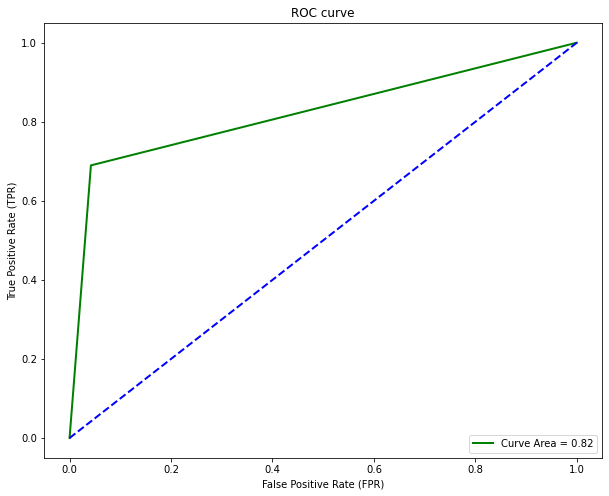

In [24]:
fpr, tpr, thr = roc_curve(y_test['Churn'], 
                          y_test['probability'])
auc = np.round(roc_auc_score(y_test['Churn'], 
                             y_test['predicted_Churn']), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()



#### Observation
- The AUC is the measure of the ability of a classifier to distinguish between classes.
- The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.
- Here the AUC is 0.82, which is acceptable but requires improvement.

### Grid Search

In [25]:
parameters = {'criterion': ['gini','entropy'],
              'max_depth': [3, 4, 5, 6, 7]}

model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model,
                           param_grid=parameters,
                           scoring="accuracy",
                           cv=5,
                           n_jobs=-1)

# fit the model with the best hyper-parameters
grid_result = grid_search.fit(X_train, y_train)
y_pred = np.round(grid_result.predict(X_test), 2)

#### hyperparameters for grid search in each iteration
- iteration 1: criterion='gini', max_depth=3
- iteration 2: criterion='gini', max_depth=4
- iteration 3: criterion='gini', max_depth=5
- iteration 4: criterion='gini', max_depth=6
- iteration 5: criterion='gini', max_depth=7
- iteration 6: criterion='entropy', max_depth=3
- iteration 7: criterion='entropy', max_depth=4
- iteration 8: criterion='entropy', max_depth=5
- iteration 9: criterion='entropy', max_depth=6
- iteration 10: criterion='entropy', max_depth=7

In [26]:
print(grid_result.best_params_)

{'criterion': 'entropy', 'max_depth': 6}


### Cross Validation

In [27]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['param_criterion', 'param_max_depth',
                       'split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,param_criterion,param_max_depth,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,entropy,6,0.944325,0.925054,0.946467,0.954936,0.920601,0.938276,0.013179,1
4,gini,7,0.940043,0.925054,0.929336,0.957082,0.937768,0.937856,0.011054,2
2,gini,5,0.937901,0.914347,0.946467,0.946352,0.942060,0.937425,0.011965,3
9,entropy,7,0.933619,0.927195,0.946467,0.931330,0.942060,0.936134,0.007088,4
3,gini,6,0.940043,0.925054,0.940043,0.944206,0.924893,0.934848,0.008205,5
7,entropy,5,0.940043,0.912206,0.940043,0.937768,0.937768,0.933566,0.010728,6
1,gini,4,0.907923,0.914347,0.935760,0.916309,0.918455,0.918559,0.009293,7
6,entropy,4,0.907923,0.914347,0.929336,0.916309,0.916309,0.916845,0.006963,8
0,gini,3,0.886510,0.905782,0.920771,0.894850,0.899142,0.901411,0.011525,9
5,entropy,3,0.886510,0.905782,0.907923,0.894850,0.873391,0.893691,0.012757,10


Index(['param_criterion', 'param_max_depth', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


### Model Performance Evalutation after Grid Search and Cross Validation

#### Visualizing confusion matrix

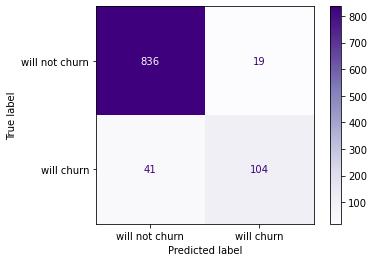

In [28]:
plot_confusion_matrix(grid_result, 
                      X_test, 
                      y_test['Churn'], 
                      display_labels=["will not churn", "will churn"],
                      cmap='Purples')
plt.show()

#### Classification metrices calculation

In [29]:
def measure(m):
    m = m(y_test['Churn'], y_pred)
    return np.round(m*100,2)

In [30]:
print("precision_score: ", measure(precision_score), "%")
print("recall_score: ", measure(recall_score), "%")
print("f1_score: ", measure(f1_score), "%")

precision_score:  84.55 %
recall_score:  71.72 %
f1_score:  77.61 %


#### Classification report

In [31]:
class_report = classification_report(y_test['Churn'], y_pred)
print("Classification Report: \n", class_report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       855
           1       0.85      0.72      0.78       145

    accuracy                           0.94      1000
   macro avg       0.90      0.85      0.87      1000
weighted avg       0.94      0.94      0.94      1000



- *Classification report gives the summary layout of the classification metrices*
> The model accuracy is approximately **94%**.<br> And the precision, recall and f1 scores **increased to 0.85, 0.72 and 0.78** respectively.

#### Receiver Operating Characterisitcs (ROC) and Area Under the Curve (AUC)

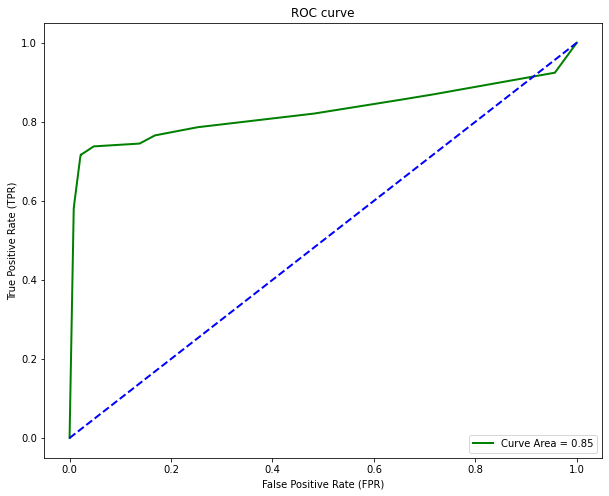

In [32]:
fpr, tpr, thr = roc_curve(y_test['Churn'], grid_result.predict_proba(X_test)[:,1])
auc = np.round(roc_auc_score(y_test['Churn'], y_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

#### Observation
- The AUC has increased to 0.85
- Accuracy, AUC, Classification metrices, all increased after performing the grid search and cross validation.

#### Outcome:
> Accuracy of the model is 94%, AUC is 0.85 and the precision, recall, and f1 score are 0.85, 0.72, and 0.78 respectively.